In [1]:
import networkx as nx
from collections import Counter
from fractions import Fraction
import numpy as np
import matplotlib.pyplot as plt

# ***Preferential Attachment Models***
------------------------------------------

Degree of a node in an undirected graph is the number of neighbours it has.          
Sometimes we are interested in the distribution of degrees throughout the network. (the spatial distribution of degrees).          

`Degree distribution` is the probability of a degree over the entire degrees.

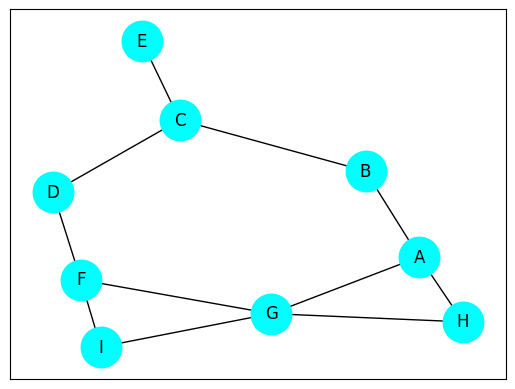

In [2]:
graph = nx.Graph()
graph.add_edges_from([("A", "B"), ("B", "C"), ("C", "D"), ("C", "E"), ("D", "F"), ("F", "G"), ("G", "I"), ("F", "I"), ("G", "H"), 
                     ("G", "A"), ("A", "H")])
nx.draw_networkx(graph, node_size = 850, node_color = "cyan")

In [3]:
# degrees of nodes

graph.degree()

DegreeView({'A': 3, 'B': 2, 'C': 3, 'D': 2, 'E': 1, 'F': 3, 'G': 4, 'I': 2, 'H': 2})

In [4]:
# frequencies of degrees

Counter(dict(graph.degree).values())

Counter({3: 3, 2: 4, 1: 1, 4: 1})

In [5]:
# unique degrees

set(dict(graph.degree()).values())

{1, 2, 3, 4}

In [6]:
graph.number_of_nodes()

9

# ***$P(degree) = \frac{frequency(degree)}{\sum(nodes)}$***

In [7]:
for (degree, freq) in Counter(dict(graph.degree).values()).items():
    print(f"P({degree}) = {Fraction(freq, 9)}")

P(3) = 1/3
P(2) = 4/9
P(1) = 1/9
P(4) = 1/9


In [8]:
ddist = Counter(dict(graph.degree).values())

In [9]:
probs = np.array(list(ddist.values()), dtype = np.int64) / 9
probs

array([0.33333333, 0.44444444, 0.11111111, 0.11111111])

In [10]:
degs = list(dict(graph.degree()).values())
degs

[3, 2, 3, 2, 1, 3, 4, 2, 2]

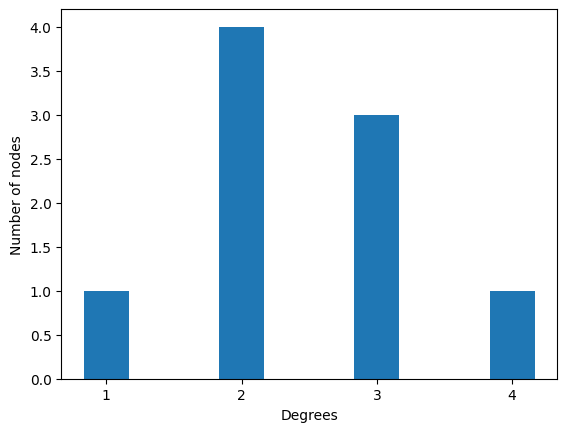

In [11]:
fig, axes = plt.subplots(nrows = 1, ncols = 1)
axes.hist(degs)
axes.set_xticks(ticks = np.linspace(1.15, 3.85, 4), labels = range(1, 5))
axes.set_ylabel("Number of nodes")
axes.set_xlabel("Degrees")
plt.show()

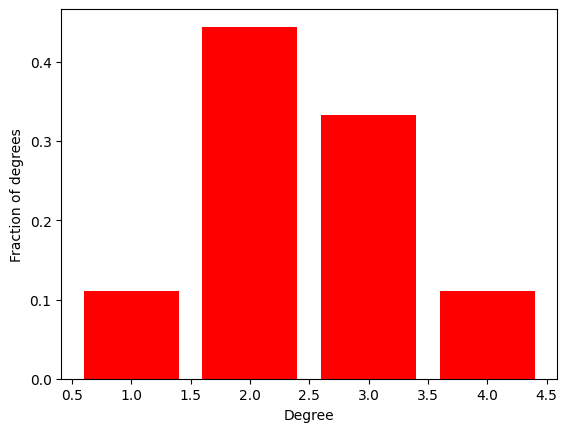

In [12]:
plt.bar(x = ddist.keys(), height = probs, color = "red")
plt.xlabel("Degree")
plt.ylabel("Fraction of degrees")
plt.show()

# ***Degree distribution in directed graphs***
-----------------------------------

In [13]:
# Two categories of degrees
# In-degrees and out-degrees

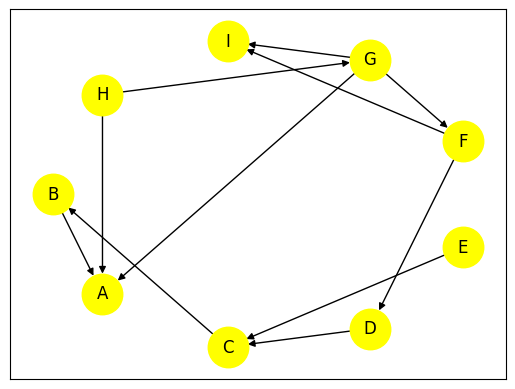

In [20]:
graph = nx.DiGraph()
graph.add_edges_from([("B", "A"), ("C", "B"), ("D", "C"), ("E", "C"), ("F", "D"), ("G", "F"), ("G", "I"), ("F", "I"), ("H", "G"), 
                     ("G", "A"), ("H", "A")])
pos = nx.shell_layout(graph)
nx.draw_networkx(graph, node_size = 850, node_color = "yellow", pos = pos)

In [21]:
graph.in_degree()

InDegreeView({'B': 1, 'A': 3, 'C': 2, 'D': 1, 'E': 0, 'F': 1, 'G': 1, 'I': 2, 'H': 0})

In [22]:
graph.out_degree()

OutDegreeView({'B': 1, 'A': 0, 'C': 1, 'D': 1, 'E': 1, 'F': 2, 'G': 3, 'I': 0, 'H': 2})

In [24]:
# In-degree distribution

for (degree, freq) in Counter(dict(graph.in_degree).values()).items():
    print(f"P({degree}) = {Fraction(freq, 9)}")

P(1) = 4/9
P(3) = 1/9
P(2) = 2/9
P(0) = 2/9


In [26]:
# Out-degree distribution

for (degree, freq) in Counter(dict(graph.out_degree).values()).items():
    print(f"P({degree}) = {Fraction(freq, 9)}")

P(1) = 4/9
P(0) = 2/9
P(2) = 2/9
P(3) = 1/9


## ***Degree distribution in real networks***

In [27]:
# When plotting the log of degrees in X axis, and log of fraction of nodes in Y axis, they tend to form more/less straight lines
# Degree distributions generaly look like straight lines on a log-log scale
# This is also known as Power law

# ***$P(k) = Ck^{-\alpha}$***

In [28]:
# Where alpha and C are constants. 

In [29]:
# In Power law degree distributions, most nodes have small degrees while few nodes have very very large degrees.

# Why does this happen? 
# Why is this common in real world networks?

In [30]:
# To answer this question, we build models that generate networks and test whether these networks have the expected properties
# i.e do the networks built by the models produce a Power law degree distribution?

## ***Preferential Attachment Model***

In [31]:
# Preferential attachment model 
# First, we start with two nodes connected by an edge
# Next, at each step, create a new node and link the new node to one existing node
# However, there is a criteria to pick the existing node to attach to.
# It is chosen randomly with a probability proportional to the node's current degree.

# ***Probability of connecting to a node u with degree $k_{u}$ is $\frac{k_{u}}{{N}}$***

In [33]:
# i.e. degree of the said node divided by the number nodes

In [34]:
# As the degrees of a node increases, the probability of it acquiring a new edge increases
# This is the Power law (Rich gets richer and poor gets poorer)
# This model allows us to hypothesize these properties of real world networks
# e.g An actor who has co-starred with many popular actors is more likely to bring in a popular actor to a crew than a less popular actor with 
# little exposure.

In [36]:
# Power law degree graphs in NetworkX

graph = nx.barabasi_albert_graph(n = 1_000_000, m = 1)

In [45]:
degrees = np.array(list(dict(graph.degree()).values()), dtype = np.int64)

In [47]:
degrees

array([ 209, 1672, 1228, ...,    1,    1,    1], dtype=int64)

In [52]:
graph.number_of_nodes()

1000000

In [53]:
degrees_and_freq = sorted([(degree, freq) for (degree, freq) in Counter(degrees).items()], key = lambda tup: tup[1], reverse = True)

In [54]:
lookup = dict()

for d_n_f in degrees_and_freq:
    lookup[d_n_f[0]] = d_n_f[1] / 1000000

In [56]:
lookup;

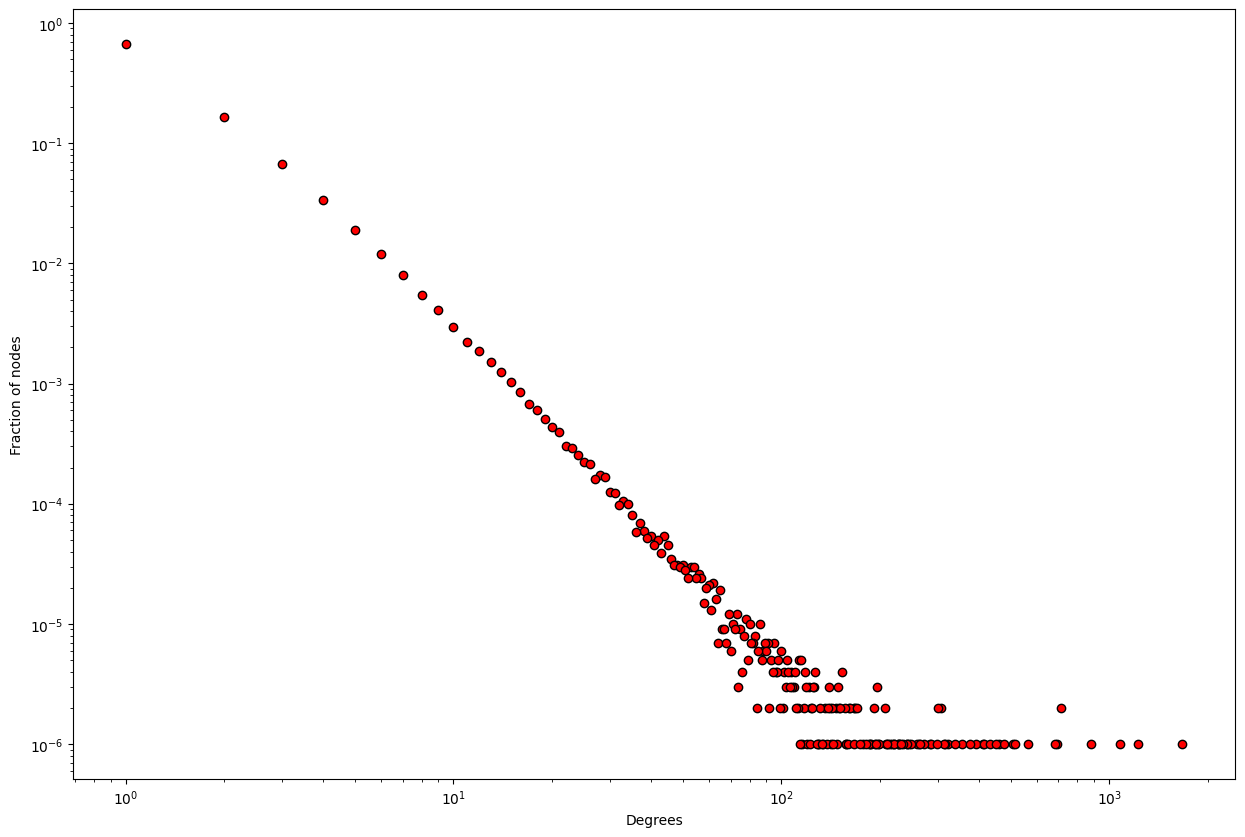

In [74]:
fig, axes = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(15, 10)
axes.plot(lookup.keys(), lookup.values(), color = "red", marker = "o", linestyle = "None", markeredgecolor = "black")
axes.set_xlabel("Degrees")
axes.set_xscale("log")
axes.set_yscale("log")
axes.set_ylabel("Fraction of nodes")
plt.show()